# 實作股價K線圖
台積電 TSMC (2330) <br>
聯發科 MediaTek (2454) 

In [5]:
import pandas as pd
import datetime as dt
import pandas_datareader as pdr
import requests
import mplfinance as mpf

def 設定Header():
    headers = {"Accept": "application/json",
           'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
           "Accept-Encoding": "none",
           "Accept-Language": "en-US,en;q = 0.8",
           "Connection": "keep-alive",
           "Referer": "https://cssspritegenerator.com",
           "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML,like Gecko) Chrome / 23.0.1271.64Safari / 537.11"
    }
    return headers
headers = 設定Header()
with requests.Session() as s:
    s.headers = headers
    
start = dt.datetime(2021, 9, 1) #開始時間
end = dt.datetime(2021, 12, 31) #結束時間
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start, end=end)
df_2454 = pdr.DataReader('2454.TW', 'yahoo', start=start, end=end)
df_2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-01,614.0,608.0,614.0,613.0,30092045.0,607.425964
2021-09-02,615.0,607.0,613.0,607.0,24112463.0,601.480530
2021-09-03,620.0,610.0,610.0,620.0,51562454.0,614.362305
2021-09-06,638.0,621.0,623.0,631.0,55589014.0,625.262268
2021-09-07,634.0,623.0,634.0,623.0,26526056.0,617.335022


### 台積電 VS 聯發科 股價線圖

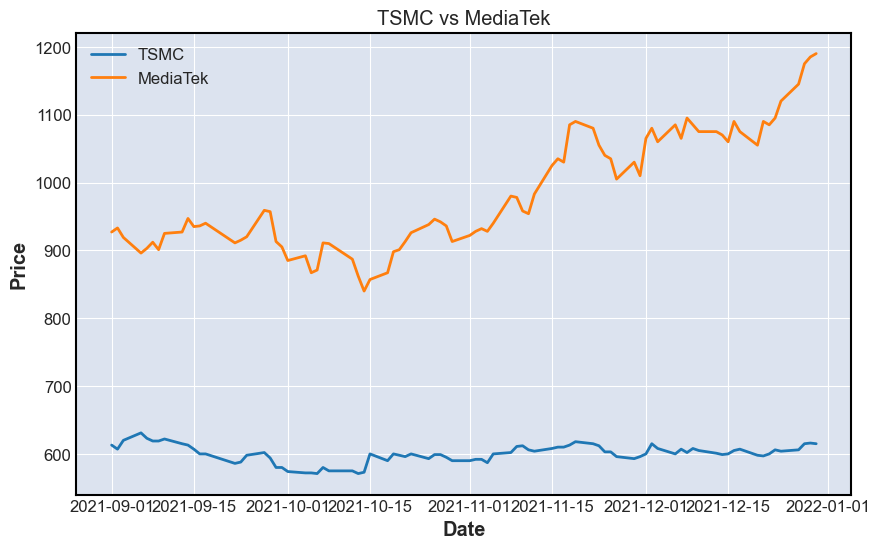

In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=(10, 6))
plt.plot(df_2330.Close, label='TSMC')
plt.plot(df_2454.Close, label='MediaTek')
#loc 標題位置
plt.title('TSMC vs MediaTek', loc='center')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, axis='y')
plt.legend()
plt.show()

### 台積電股價K線圖
繪製股價圖表套件 mplfinance <br>
Github 網址：https://github.com/matplotlib/mplfinance

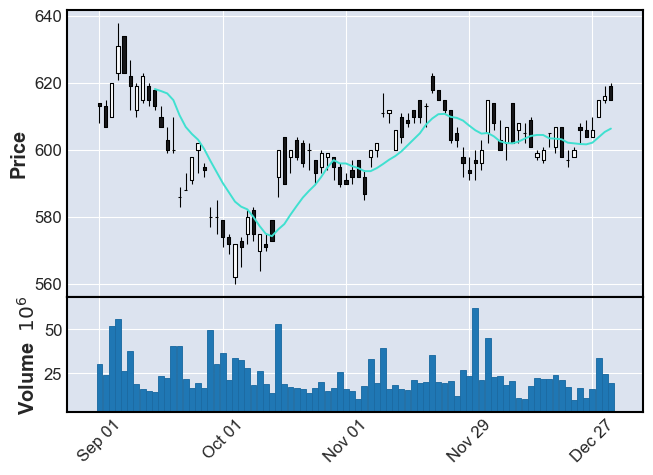

In [7]:
mpf.plot(df_2330, type='candle', mav=10, volume=True)